# **Financial News Analysis**

***By Beckham Berhanu***

---



# **TASK 1**


---





# Load and Clean the Data

In [ ]:
# Load the data
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#import neccessary libraries for loading and cleaning the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Load the dataset
path1="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/raw_analyst_ratings.csv"
path2="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/AAPL_historical_data.csv"
path3="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/AMZN_historical_data.csv"
path4="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/GOOG_historical_data.csv"
path5="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/META_historical_data.csv"
path6="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/MSFT_historical_data.csv"
path7="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/NVDA_historical_data.csv"
path8="/content/drive/MyDrive/KAIM/Data/Financial News Analysis/TSLA_historical_data.csv"

In [ ]:
print("Loading Datasets...")
df_ratings = pd.read_csv(path1)
df_apple = pd.read_csv(path2)
df_amazon = pd.read_csv(path3)
df_google = pd.read_csv(path4)
df_meta = pd.read_csv(path5)
df_msft = pd.read_csv(path6)
df_nvdia = pd.read_csv(path7)
df_tsla = pd.read_csv(path8)

# Display first few rows of each dataset to review
print("\nRaw Analyst Ratings Dataset :")
print(df_ratings.head())

print("\nApple Historical Data:")
print(df_apple.head())

print("\nAmazon Historical Data:")
print(df_amazon.head())

print("\nGoogle Historical Data:")
print(df_google.head())

print("\nMeta Historical Data:")
print(df_meta.head())

print("\nMicrosft Historical Data:")
print(df_msft.head())

print("\nNvidia Historical Data:")
print(df_nvdia.head())

print("\nTesla Historical Data:")
print(df_tsla.head())

Loading Datasets...

Raw Analyst Ratings Dataset :
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 1

In [ ]:
# Check for missing values in each dataset

print(df_ratings.isnull().sum())
print(df_msft.isnull().sum())
print(df_apple.isnull().sum())
print(df_amazon.isnull().sum())
print(df_google.isnull().sum())
print(df_meta.isnull().sum())
print(df_tsla.isnull().sum())
print(df_nvdia.isnull().sum())

# Drop 'Unamed: 0' column
df_ratings = df_ratings.drop(columns=['Unnamed: 0'], errors='ignore')

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Date            

Handle missing Values

In [ ]:
# Drop missing values

df_ratings = df_ratings.dropna()
df_msft = df_msft.dropna()
df_apple = df_apple.dropna()
df_amazon = df_amazon.dropna()
df_google = df_google.dropna()
df_meta = df_meta.dropna()
df_tsla = df_tsla.dropna()
df_nvdia = df_nvdia.dropna()
df_ratings = df_ratings.dropna()

# Descriptive Statistics


Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


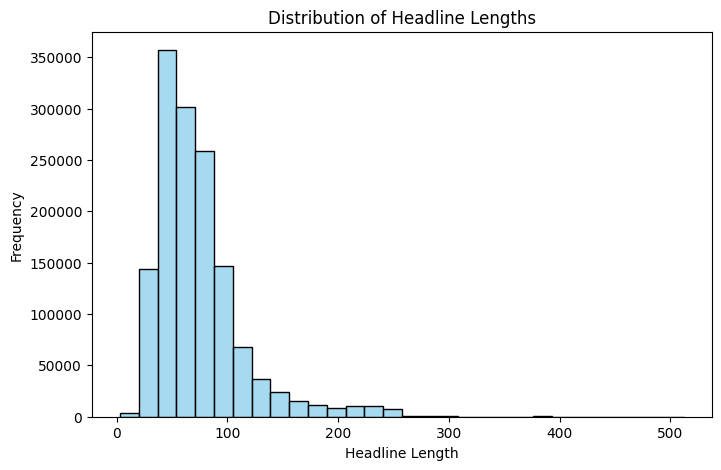

In [ ]:
# Headline lengths

df_ratings['headline_length'] = df_ratings['headline'].apply(len)
print("\nHeadline Length Statistics:")
print(df_ratings['headline_length'].describe())

# Plot headline lengths
plt.figure(figsize=(8, 5))
sns.histplot(df_ratings['headline_length'], bins=30, color='skyblue')
plt.title("Distribution of Headline Lengths")
plt.xlabel("Headline Length")
plt.ylabel("Frequency")
plt.show()


Top 10 Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


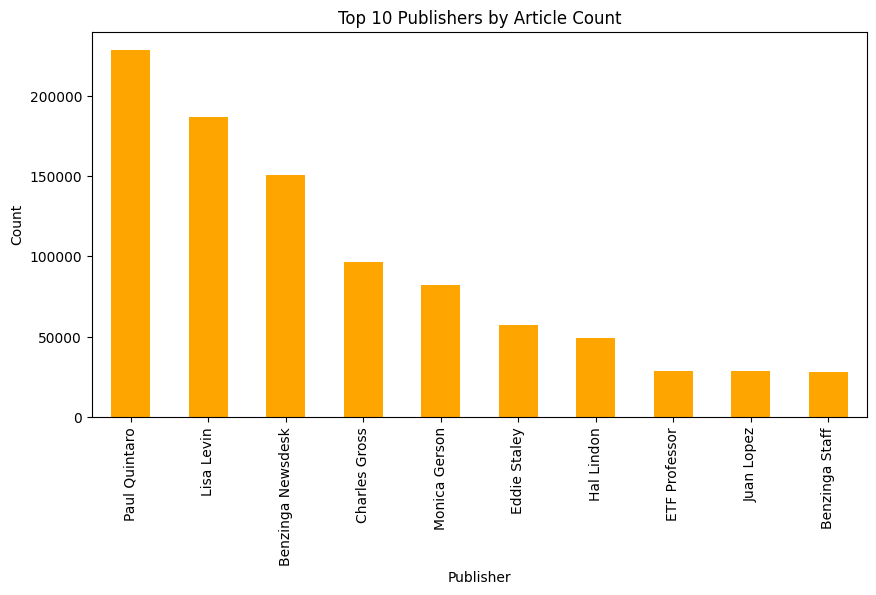

In [ ]:
# Articles per publisher
publisher_counts = df_ratings['publisher'].value_counts()
print("\nTop 10 Publishers:")
top_publishers = publisher_counts.head(10)
print(top_publishers)

# Plot top publishers
plt.figure(figsize=(10, 5))
publisher_counts.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Count")
plt.show()

<ipython-input-9-dd0f59986457>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_ratings['year_month'] = df_ratings['date'].dt.to_period('M')


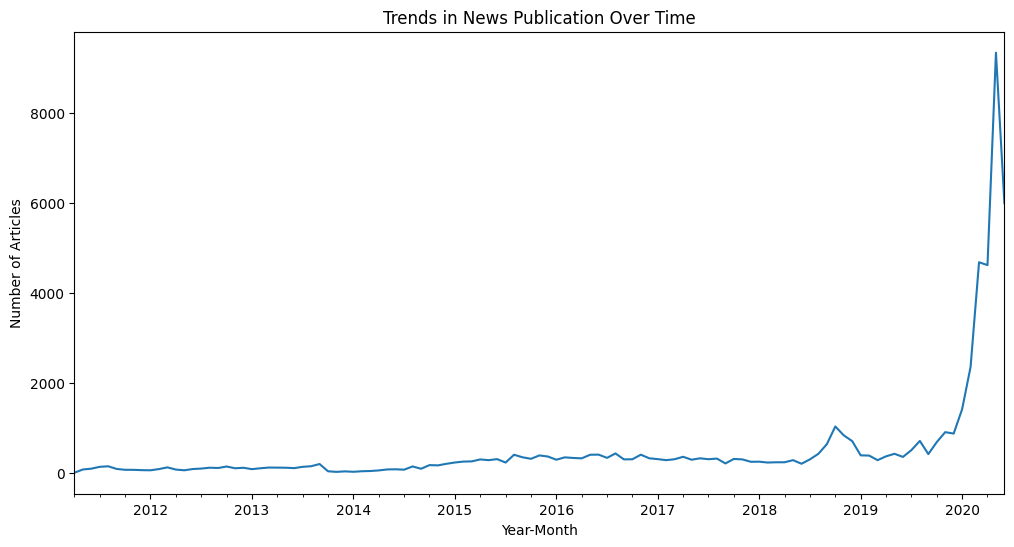

In [ ]:
# Analyze publication dates
df_ratings['date'] = pd.to_datetime(df_ratings['date'], errors='coerce')
df_ratings['year_month'] = df_ratings['date'].dt.to_period('M')

plt.figure(figsize=(12, 6))
df_ratings['year_month'].value_counts().sort_index().plot()
plt.title("Trends in News Publication Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Articles")
plt.show()


Unique Stocks in Headlines Data:
['A' 'AA' 'AAC' ... 'ZU' 'ZUMZ' 'ZX']

Number of Articles Per Stock:
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
PLW        1
RFT        1
WIP        1
ONEQ       1
BHL        1
Name: count, Length: 6204, dtype: int64


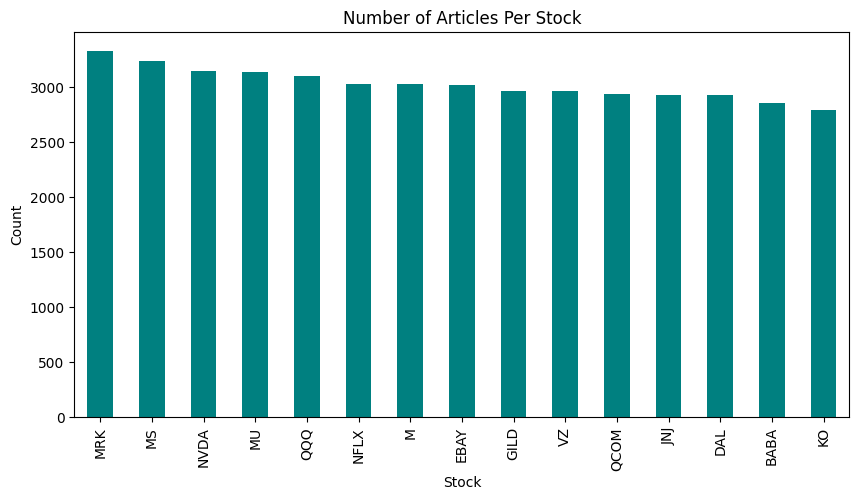

In [ ]:
# Check unique stocks
print("\nUnique Stocks in Headlines Data:")
print(df_ratings['stock'].unique())

# Count articles per stock
stock_counts = df_ratings['stock'].value_counts()
print("\nNumber of Articles Per Stock:")
print(stock_counts)

# Plot articles per stock
plt.figure(figsize=(10, 5))
stock_counts.head(15).plot(kind='bar', color='teal')
plt.title("Number of Articles Per Stock")
plt.xlabel("Stock")
plt.ylabel("Count")
plt.show()

# Sentiment Analysis

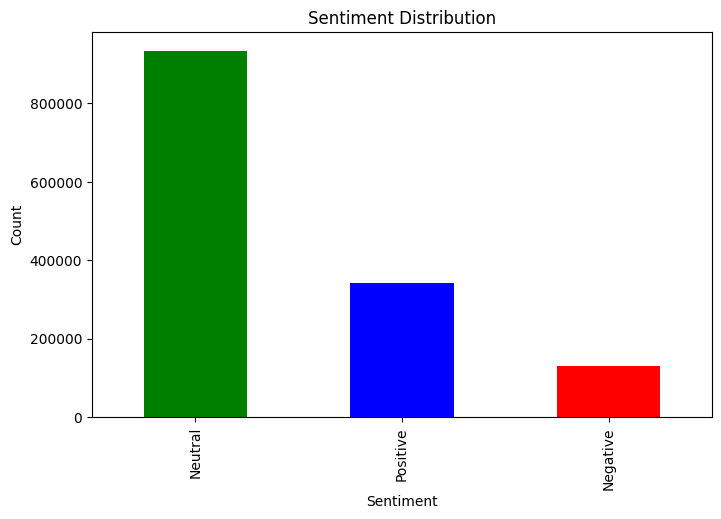

In [ ]:
# import libraries for sentiment analysis and topic modelling
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation

# Clean column names
df_ratings.columns = [col.strip().lower() for col in df_ratings.columns]

# Perform sentiment analysis
def analyze_sentiment(text):
    try:
        analysis = TextBlob(text)
        if analysis.sentiment.polarity > 0:
            return 'Positive'
        elif analysis.sentiment.polarity == 0:
            return 'Neutral'
        else:
            return 'Negative'
    except:
        return 'Neutral'

df_ratings['sentiment'] = df_ratings['headline'].apply(analyze_sentiment)

# Visualize sentiment distribution
sentiment_counts = df_ratings['sentiment'].value_counts()
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Topic Modeling

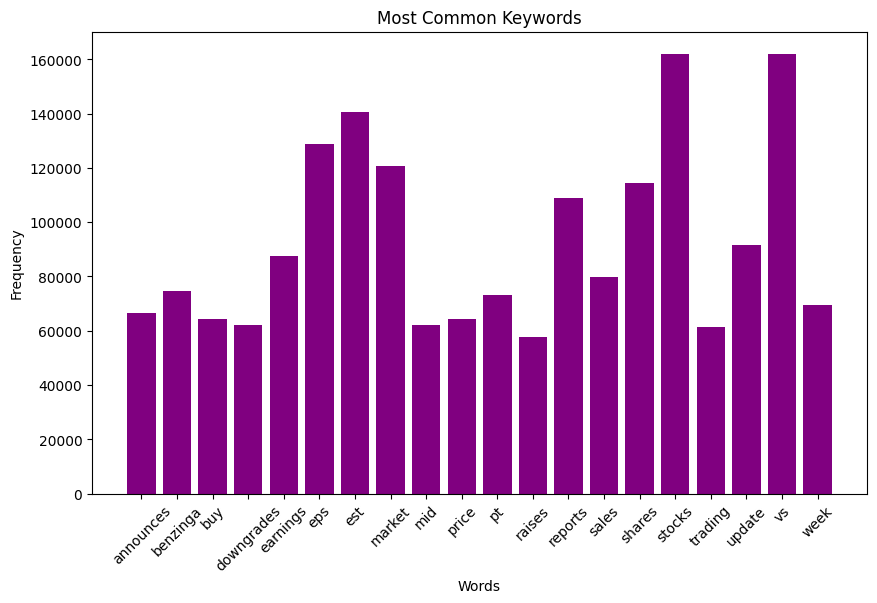

In [ ]:
# Extract common keywords using CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = vectorizer.fit_transform(df_ratings['headline'].fillna('')).toarray()
words = vectorizer.get_feature_names_out()
word_frequencies = word_counts.sum(axis=0)

# Plot word frequencies
plt.figure(figsize=(10, 6))
plt.bar(words, word_frequencies, color='purple')
plt.title('Most Common Keywords')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Perform topic modeling using LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topics = lda.fit_transform(word_counts)
terms = vectorizer.get_feature_names_out()

# Display top words in each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    print(" ".join([terms[j] for j in topic.argsort()[-10:]]))

Topic 1:
trading vs shares downgrades week update mid reports market earnings
Topic 2:
shares buy price trading pt mid market announces week stocks
Topic 3:
earnings shares trading update raises reports sales eps est vs
Topic 4:
benzinga market shares update announces downgrades raises buy price pt
Topic 5:
buy sales price downgrades mid market trading benzinga update shares


### Time Series Analysis

In [ ]:
#Convert the date column to a datetime object

df_ratings['date'] = pd.to_datetime(df_ratings['date'])
# Extract key date features such as year, month, and day:
df_ratings['year'] = df_ratings['date'].dt.year
df_ratings['month'] = df_ratings['date'].dt.month
df_ratings['day'] = df_ratings['date'].dt.day
df_ratings['hour'] = df_ratings['date'].dt.hour

# Group by date to analyze publication frequency:
daily_publications = df_ratings.groupby(df_ratings['date'].dt.date).size()
print(daily_publications.head())

date
2011-04-27    1
2011-04-28    2
2011-04-29    2
2011-04-30    1
2011-05-01    1
dtype: int64


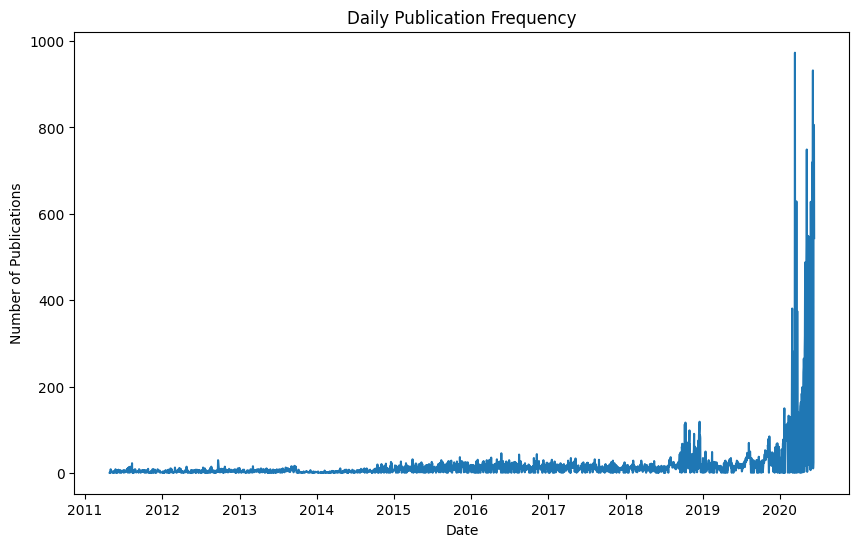

In [ ]:
#Plot the daily publication frequency

daily_publications.plot(kind='line', figsize=(10, 6), title='Daily Publication Frequency')
plt.xlabel('Date')
plt.ylabel('Number of Publications')
plt.show()

Spikes in publication frequency:
 date
2020-02-27    275
2020-02-28    381
2020-03-06    281
2020-03-11    282
2020-03-12    973
2020-03-19    629
2020-03-23    375
2020-03-24    160
2020-04-09    164
2020-04-13    184
2020-04-15    186
2020-04-16    199
2020-04-17    194
2020-04-20    180
2020-04-21    233
2020-04-22    245
2020-04-23    265
2020-04-24    246
2020-04-27    283
2020-04-28    317
2020-04-29    449
2020-04-30    488
2020-05-01    385
2020-05-04    347
2020-05-05    478
2020-05-06    531
2020-05-07    749
2020-05-08    508
2020-05-11    485
2020-05-12    387
2020-05-13    549
2020-05-14    536
2020-05-15    322
2020-05-18    547
2020-05-19    332
2020-05-20    461
2020-05-21    333
2020-05-22    286
2020-05-26    628
2020-05-27    492
2020-05-28    465
2020-05-29    309
2020-06-01    484
2020-06-02    361
2020-06-03    720
2020-06-04    538
2020-06-05    932
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
dtype: int64
hour
0.0       67
1.0       14

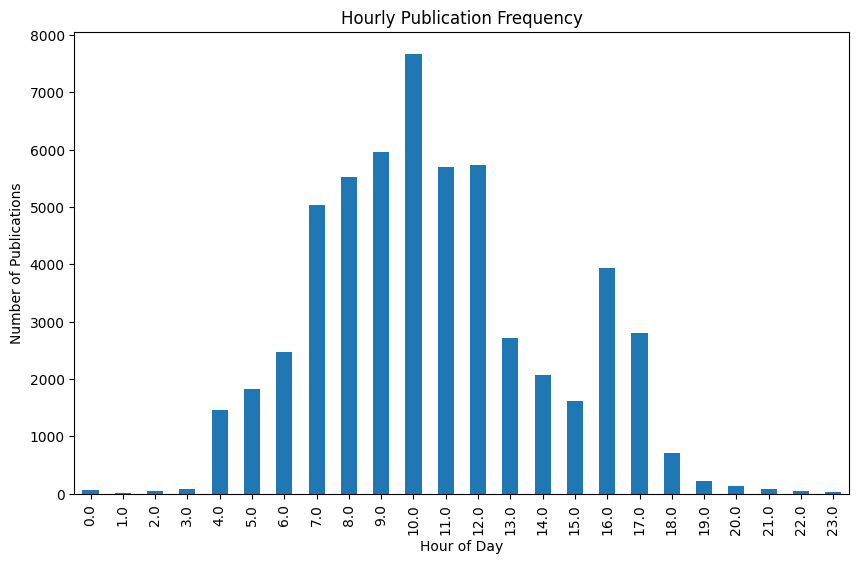

In [ ]:
# Look for dates with unusually high publication counts

spikes = daily_publications[daily_publications > daily_publications.mean() + 2 * daily_publications.std()]
print("Spikes in publication frequency:\n", spikes)

#Group by hour to determine the frequency of publications

hourly_publications = df_ratings.groupby('hour').size()
print(hourly_publications)

#Plot hourly publication distribution

hourly_publications.plot(kind='bar', figsize=(10, 6), title='Hourly Publication Frequency')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Publications')
plt.show()


**Publisher Analysis**

sentiment         Negative  Neutral  Positive
publisher                                    
47ertrends             NaN     18.0       NaN
AARP                   NaN      2.0       5.0
ABNNewswire            8.0      5.0       NaN
Aakin                  NaN      1.0       4.0
Aaron Jackson.Ed       1.0      NaN      15.0


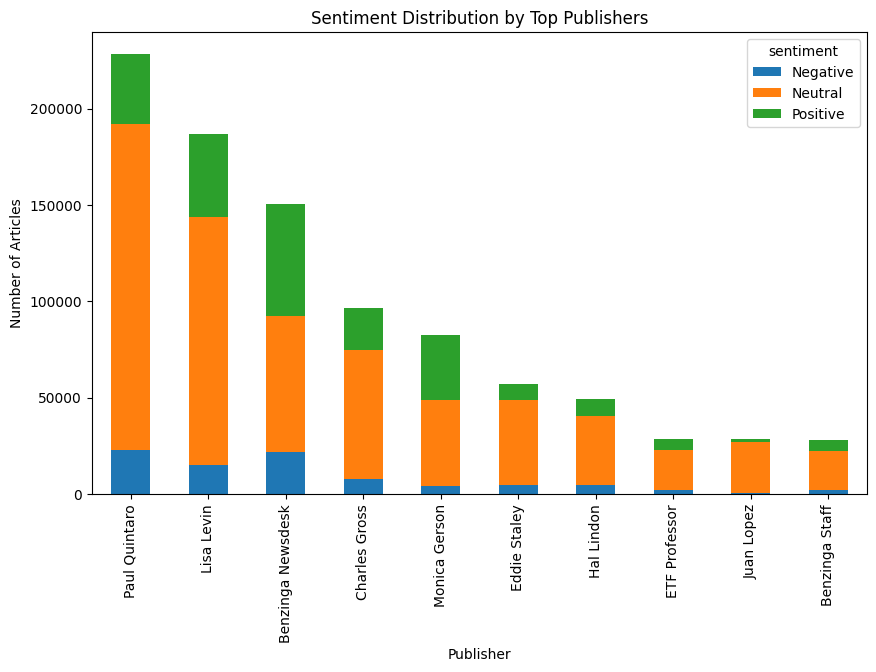

In [ ]:
# Compare sentiment distribution for different publishers

sentiment_by_publisher = df_ratings.groupby('publisher')['sentiment'].value_counts().unstack()
print(sentiment_by_publisher.head())

# Plot sentiment distribution for top publishers

sentiment_by_publisher.loc[top_publishers.index].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Distribution by Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


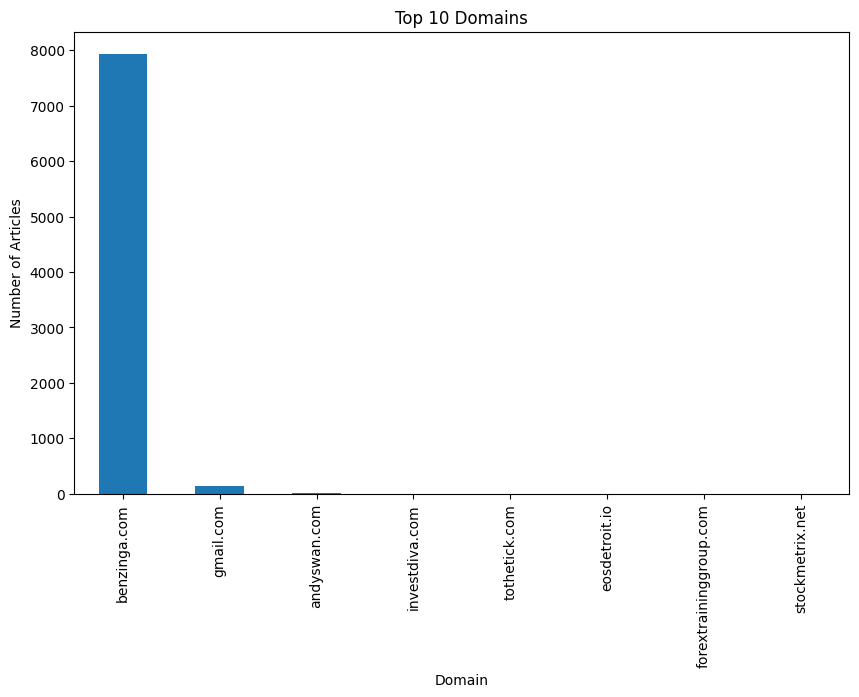

In [ ]:
# Extract domains from publishers
df_ratings['domain'] = df_ratings['publisher'].str.extract(r'@([\w\.-]+)')
domain_counts = df_ratings['domain'].value_counts()
print(domain_counts.head(10))

# Analyze and visualize domains

domain_counts.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Domains')
plt.xlabel('Domain')
plt.ylabel('Number of Articles')
plt.show()



---


# **TASK 2: Quantitative analysis using pynance and TaLib**


---



In [25]:
# List of DataFrames to merge
dfs = [df_apple, df_amazon, df_google, df_meta, df_msft, df_nvdia, df_tsla]

# Concatenate DataFrames row-wise
stock_data = pd.concat(dfs, ignore_index=True)

# Display the merged DataFrame
print(stock_data)

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.098943   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.093781   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.086898   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089049   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.091630   
...           ...         ...         ...         ...         ...         ...   
45423  2024-07-24  225.419998  225.990005  214.710007  215.990005  215.990005   
45424  2024-07-25  216.800003  226.000000  216.229996  220.250000  220.250000   
45425  2024-07-26  221.190002  222.279999  215.330002  219.800003  219.800003   
45426  2024-07-29  224.899994  234.270004  224.699997  232.100006  232.100006   
45427  2024-07-30  232.250000  232.410004  220.000000  222.619995  222.619995   

          Volume  Dividends

In [29]:
# !pip install TA-Lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz

--2024-12-18 12:29:54--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.12.149, 104.18.13.149, 2606:4700::6812:c95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.12.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-12-18 12:29:55--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:c95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-12-18 12:29:55--  http://pilotfiber.dl.

### **Quantitative Analysis Using TA-Lib**

In [31]:
!ls

drive  sample_data  ta-lib-0.4.0-src.tar.gz


In [32]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [33]:
import os

os.chdir('ta-lib') # Can't use !cd in co-lab
!./configure --prefix=/usr
!make
!make install
# wait ~ 30s
os.chdir('../')

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking for gcc... gcc
checking for C compiler default output file name... a.out
checking whether the C compiler works... yes
checking whether we are cross compiling... no
checking for suffix of executables... 
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for style of include used by make... GNU
checking dependency style of gcc... gcc3
checking build system type... x86_64-unknown-linux-gnu
checking host system type... x86_64-unknown-linux-gnu
checking for a sed that does not truncate output... /usr/bin/sed
checking for grep that handles long lines and -e... /usr/bin/grep
chec

In [34]:
!pip install TA-Lib

  Using cached TA-Lib-0.5.1.tar.gz (369 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-Lib: filename=ta_lib-0.5.1-cp310-cp310-linux_x86_64.whl size=2415843 sha256=11a33ce91a046afe22872a6d881988d7b79c9569f87084f6da118ce1ceba71b6
  Stored in directory: /root/.cache/pip/wheels/6f/4c/41/864a7f29425201b8ba95dd8935d441bb0aff1b154514386c55
Successfully built TA-Lib


In [38]:
import talib

# Calculate 20-day SMA
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)

# Calculate 14-day RSI
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)

# Calculate MACD and Signal Line
stock_data['MACD'], stock_data['MACD_Signal'], _ = talib.MACD(stock_data['Close'])

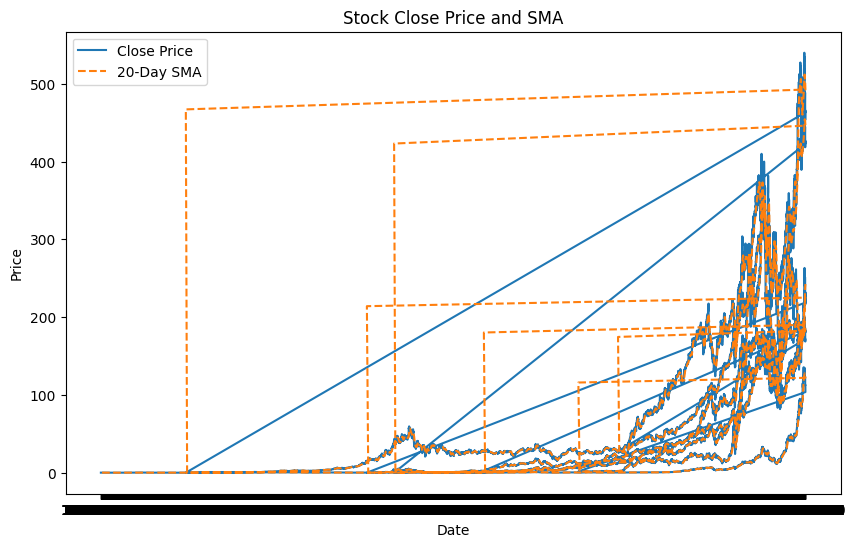

In [39]:
# Plot Close Price and SMA
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price')
plt.plot(stock_data['Date'], stock_data['SMA_20'], label='20-Day SMA', linestyle='--')
plt.title('Stock Close Price and SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

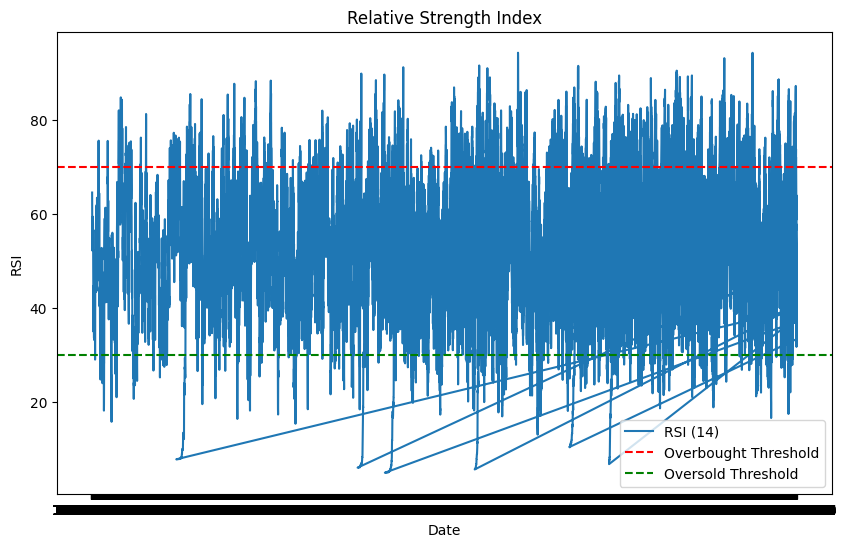

In [40]:
# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['RSI_14'], label='RSI (14)')
plt.axhline(70, color='r', linestyle='--', label='Overbought Threshold')
plt.axhline(30, color='g', linestyle='--', label='Oversold Threshold')
plt.title('Relative Strength Index')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

### **Quantitative Analysis Using Pynance**

In [52]:
!pip3 install pynance

In [57]:
import yfinance as yf

# Download stock data
prices = yf.download(['AMZN'], start='2020-01-01', end='2024-01-01')

# Calculate key metrics (Adjust as needed for yfinance)
print(prices.describe())

[*********************100%***********************]  1 of 1 completed

Price     Adj Close        Close         High          Low         Open  \
Ticker         AMZN         AMZN         AMZN         AMZN         AMZN   
count   1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean     137.216247   137.216247   139.034453   135.376526   137.255245   
std       27.468805    27.468805    27.607319    27.413947    27.576463   
min       81.820000    81.820000    83.480003    81.301498    82.075500   
25%      114.309002   114.309002   116.115000   112.434999   113.835001   
50%      140.585007   140.585007   143.375000   138.939751   140.830254   
75%      161.190620   161.190620   162.888756   159.206749   161.148872   
max      186.570496   186.570496   188.654007   184.839493   187.199997   

Price         Volume  
Ticker          AMZN  
count   1.006000e+03  
mean    7.537906e+07  
std     3.382767e+07  
min     2.237840e+07  
25%     5.278502e+07  
50%     6.577000e+07  
75%     8.729165e+07  
max     3.113460e+08  


# **TASK 3: Correlation Between News and Stock Movement**


In [44]:
df_ratings['date'] = pd.to_datetime(df_ratings['date']).dt.date
stock_data['date'] = pd.to_datetime(stock_data['Date']).dt.date

merged_data = pd.merge(df_ratings, stock_data, on='date', how='inner')

In [45]:
# Compute daily percentage change in stock prices.

merged_data['daily_return'] = merged_data['Close'].pct_change()

In [48]:
#Compute average sentiment for each day.

# Convert 'sentiment' to numeric representation before calculating the mean
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
merged_data['sentiment_numeric'] = merged_data['sentiment'].map(sentiment_mapping)

daily_sentiments = merged_data.groupby('date')['sentiment_numeric'].mean()

In [50]:
#Compute the correlation between average daily sentiment and stock returns.

correlation = merged_data[['daily_return', 'sentiment_numeric']].corr()
print(correlation)

                   daily_return  sentiment_numeric
daily_return           1.000000          -0.012505
sentiment_numeric     -0.012505           1.000000
